In [391]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [392]:
heart = pd.read_csv('heart.csv')

df = heart.copy()
df = df.dropna()

In [393]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [395]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


<Axes: xlabel='target'>

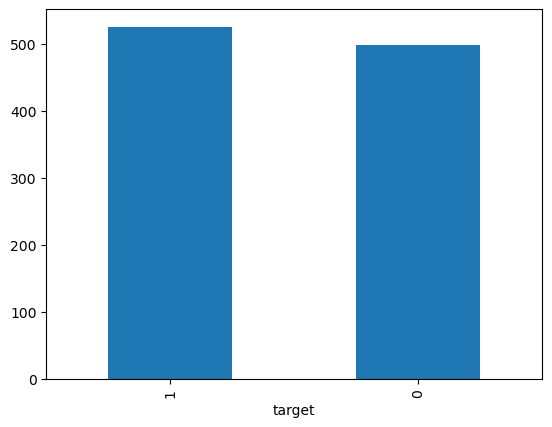

In [396]:
df['target'].value_counts().plot.bar()

In [408]:
y = df['target']
X = df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=15)

In [409]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [410]:
X_train_scaled.shape

(717, 13)

In [411]:
X_train_scaled[:5]

array([[ 0.83599006,  0.66096426,  1.04599106, -0.09772785, -0.26484306,
        -0.42798168,  0.91335066, -0.11696694, -0.72941845,  0.60884485,
        -0.60461194,  2.22075228,  1.09191624],
       [ 0.94619503,  0.66096426,  2.03021099,  0.76238917, -0.22539308,
         2.33654862, -0.98483027,  0.05839176, -0.72941845,  1.03707887,
        -2.21616124, -0.72973454, -2.0522763 ],
       [-1.91913437, -1.51294112,  1.04599106, -0.67113919, -0.58044288,
        -0.42798168,  0.91335066,  0.93518526, -0.72941845, -0.93279761,
         1.00693736, -0.72973454, -0.48018003],
       [ 0.6155801 , -1.51294112, -0.92244881,  1.04909484,  0.26773165,
        -0.42798168, -0.98483027,  0.36526948, -0.72941845,  1.29401928,
        -0.60461194,  1.23725668,  1.09191624],
       [-0.37626469,  0.66096426, -0.92244881,  0.4756835 ,  0.32690662,
        -0.42798168, -0.98483027,  1.63662005,  1.37095517, -0.93279761,
         1.00693736, -0.72973454, -0.48018003]])

In [419]:
# Model oluşturma

model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# Model derleme

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Model eğitimi 

history = model.fit(X_train_scaled, 
                    y_train, 
                    epochs=40, 
                    validation_data=(X_test_scaled, y_test))

# Modelin test setindeki performansı

loss, accuracy = model.evaluate(X_test_scaled, y_test)



Epoch 1/40


c:\Users\gorke\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5232 - loss: 0.7219 - val_accuracy: 0.5812 - val_loss: 0.6479
Epoch 2/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5956 - loss: 0.6505 - val_accuracy: 0.7273 - val_loss: 0.5726
Epoch 3/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 0.5651 - val_accuracy: 0.7597 - val_loss: 0.5080
Epoch 4/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7748 - loss: 0.5070 - val_accuracy: 0.8052 - val_loss: 0.4567
Epoch 5/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8286 - loss: 0.4481 - val_accuracy: 0.8182 - val_loss: 0.4204
Epoch 6/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8136 - loss: 0.4290 - val_accuracy: 0.8214 - val_loss: 0.3956
Epoch 7/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3762 - val_accuracy: 0.8279 - val_loss: 0.3754
Epoch 8/40
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8412 - loss: 0.3596 - val_accuracy: 0.8344 - val_loss: 0.3618
Epo

In [420]:
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 91.56


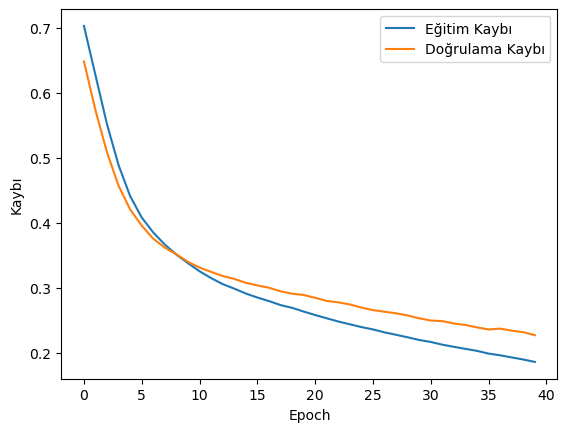

In [421]:
# Eğitim ve doğrulama kayıplarını çizdirme

plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kaybı')
plt.legend()
plt.show()

In [426]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = model.predict(X_test) > 0.5
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Precision: 0.8128654970760234
Recall: 0.8475609756097561
F1-Score: 0.8298507462686567


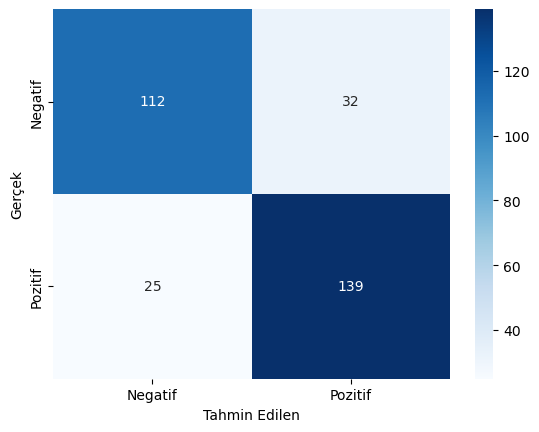

[[112  32]
 [ 25 139]]


In [427]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Pozitif'], yticklabels=['Negatif', 'Pozitif'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.show()
print(cm)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
AUC: 0.9192496612466123


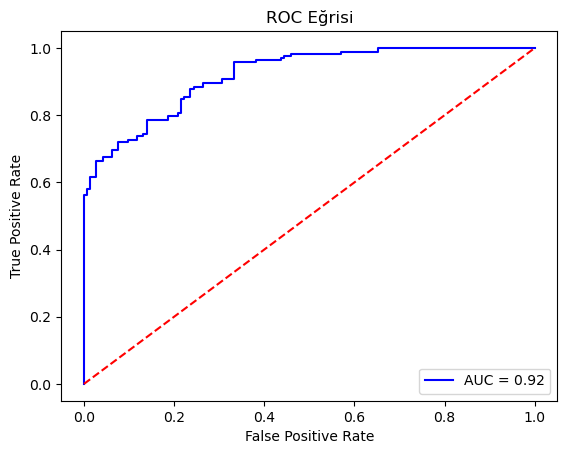

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
auc_score = auc(fpr, tpr)
print(f"AUC: {auc_score}")

plt.figure()
plt.plot(fpr, tpr, color='b', label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()
